<a href="https://colab.research.google.com/github/Bright-Momo/SimplifiedJournalsGame/blob/main/SimplifiedJournalsGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nashpy


In [ ]:
import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:

# Parameters
alpha = 0.6    # Probability of a good paper
epsilon = 0.1  # Probability of misclassifying a good paper as bad
lam = 0.1       # Probability of misclassifying a bad paper as good
r = 1.0         # Reward for author when accepted
c = 0.5         # Cost for author when rejected



In [ ]:
# Journal payoff as average quality (as an example)
def Q(alpha, epsilon, lam):
    numerator = alpha * (1 - epsilon)
    denominator = alpha * (1 - epsilon) + (1 - alpha) * lam
    return numerator / denominator

In [ ]:

# Author: Rows = [Only_Submit_Good, Always_Submit]
# Journal: Columns = [Only_Accept_Good, Always_Accept]

# Calculate author payoffs

def create_game(alpha, epsilon, lam, r, c):
  P_acc_S_strict = alpha * (1 - epsilon)
  U_A_1_1 = P_acc_S_strict * r - (1 - P_acc_S_strict) * c


  # Probability that a good paper occurs is alpha, acceptance = 1 in that case.
  U_A_1_2 = alpha * r

  # Case 3: Author Always_Submit, Journal Only_Accept_Good
  # Acceptance rate = alpha(1 - epsilon) + (1 - alpha)*lam
  P_acc_S_always = alpha * (1 - epsilon) + (1 - alpha) * lam
  U_A_2_1 = P_acc_S_always * r - (1 - P_acc_S_always) * c

  # Case 4: Author Always_Submit, Journal Always_Accept
  # Always accept means acceptance probability = 1
  U_A_2_2 = r

  author_payoffs = np.array([
      [U_A_1_1, U_A_1_2],
      [U_A_2_1, U_A_2_2]
  ])

  Q_strict = Q(alpha, epsilon, lam)  # Average quality if journal tries Only_Accept_Good
  Q_lenient = alpha                  # If Always_Accept, average quality = alpha (all papers accepted)

  # Journal payoffs:
  U_J_1_1 = Q_strict    # (Only_Submit_Good, Only_Accept_Good)
  U_J_1_2 = 1.0         # (Only_Submit_Good, Always_Accept) = 100% good (since only good are submitted)
  U_J_2_1 = Q_strict
  U_J_2_2 = Q_lenient
  journal_payoffs = np.array([
      [U_J_1_1, U_J_1_2],
      [U_J_2_1, U_J_2_2]
  ])

  # Create the game
  game = nash.Game(author_payoffs, journal_payoffs)
  return game

In [ ]:
def probability_of_scientist__self_selection(alpha, epsilon, lam, r, c):
  game = create_game(alpha, epsilon, lam, r, c)
  # Find Nash equilibria using support enumeration
  equilibria = list(game.support_enumeration())
  return equilibria[0][0][0]

In [ ]:
def probability_of_journal__selection(alpha, epsilon, lam, r, c):
  game = create_game(alpha, epsilon, lam, r, c)
  # Find Nash equilibria using support enumeration
  equilibria = list(game.support_enumeration())
  return equilibria[0][1][0]

In [ ]:
probability_of_scientist__self_selection(alpha, epsilon, lam, r, c)

0.0

In [ ]:
probability_of_scientist__self_selection(0.5, epsilon=0.1, lam=0.4, r=5, c=1)

0.0

Text(0, 0.5, 'Probability of self selection')

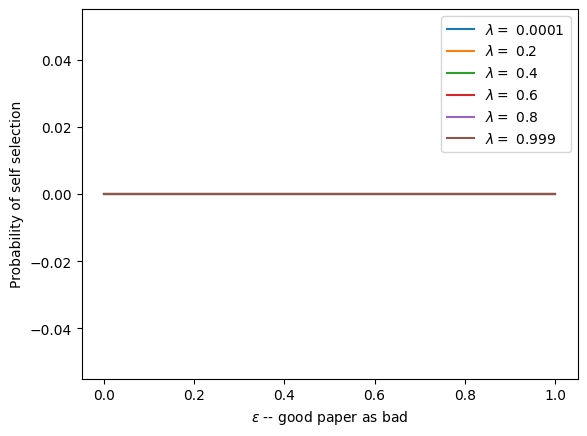

In [ ]:
x = np.linspace(0.0, 1.0, 100, True)
for lam in [0.0001, 0.2, 0.4, 0.6, 0.8, 0.999]:
    y = [probability_of_scientist__self_selection(0.5, epsilon=x_value, lam=lam, r=5, c=1) for x_value in x]
    plt.plot(x, y, label=r"$\lambda =$ {}".format(lam))
plt.legend()
plt.xlabel(r"$\epsilon$ -- good paper as bad")
plt.ylabel("Probability of self selection")

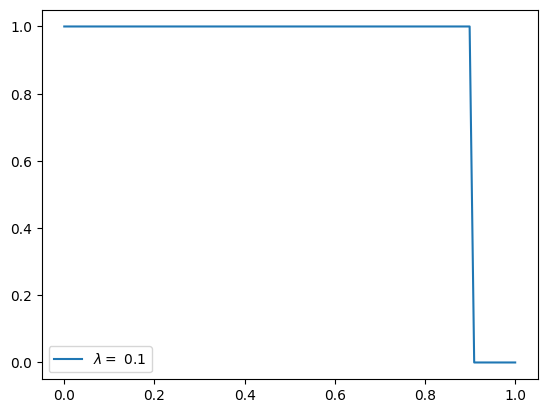

In [ ]:
x = np.linspace(0.0, 1.0, 100, True)
#[0.0001, 0.2, 0.4, 0.6, 0.8, 0.999]
for lam in [0.1]:
    y = [probability_of_journal__selection(0.5, epsilon=x_value, lam=lam, r=5, c=1) for x_value in x]
    plt.plot(x, y, label=r"$\lambda =$ {}".format(lam))
plt.legend()

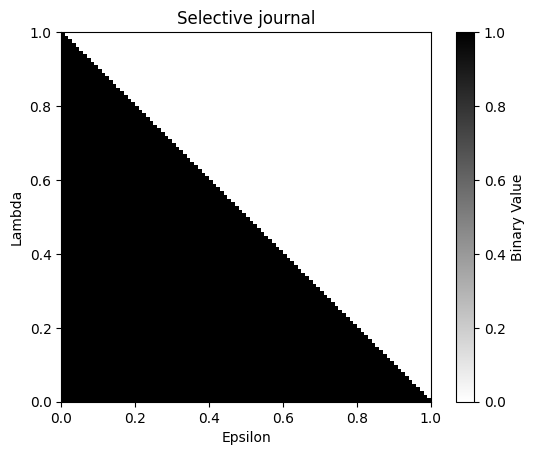

In [ ]:

# Define the range for x and y
x = np.linspace(0.0001, 0.999, 100) # epsilon
y = np.linspace(0.0001, 0.999, 100) # lambda

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Define a function that takes x and y as input
def condition_function(x, y):
    return probability_of_journal__selection(0.5, epsilon=x, lam=y, r=1, c=1)

# Initialize an empty binary matrix
binary_matrix = np.zeros_like(X, dtype=int)

# Populate the binary matrix using a loop
for i in range(binary_matrix.shape[0]):  # Loop over rows
    for j in range(binary_matrix.shape[1]):  # Loop over columns
        if condition_function(X[i, j], Y[i, j]):
            binary_matrix[i, j] = 1
        else:
            binary_matrix[i, j] = 0

# Visualize the binary matrix
plt.imshow(binary_matrix, extent=(0, 1, 0, 1), origin='lower', cmap='binary')
plt.colorbar(label='Binary Value')
plt.xlabel('Epsilon')
plt.ylabel('Lambda')
plt.title('Selective journal')
plt.show()

print('Binary Value')
